In [14]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [6]:
df_info = pd.read_pickle("df_desc")

In [7]:
df_info.head()

,Description
0,\n\n PAPILLO EU...
1,\n\n Rif: 18083...
2,\n\n San Giovan...
3,\n\n Rif: 18067...
4,\n\n Rif: 18028...


In [13]:
top_3_clustors=[([1,2,3,4,5],[5,6,7,8,9]),([11,12,13,14,15],[14,15,16,17,18]),([21,22,23,24,25],[24,25,26,27,28])]

We are considering, we already have clustors like above as couple. So we will then extract the descrpition from the clustors using description datframe above and will create wordcloud. 

W have to mask wordcloud to the image that I have downloaded as house. For this I will create a matrix mask. 

In [108]:
house_mask = np.array(Image.open("house.png"))
house_mask[house_mask > 0] = 255

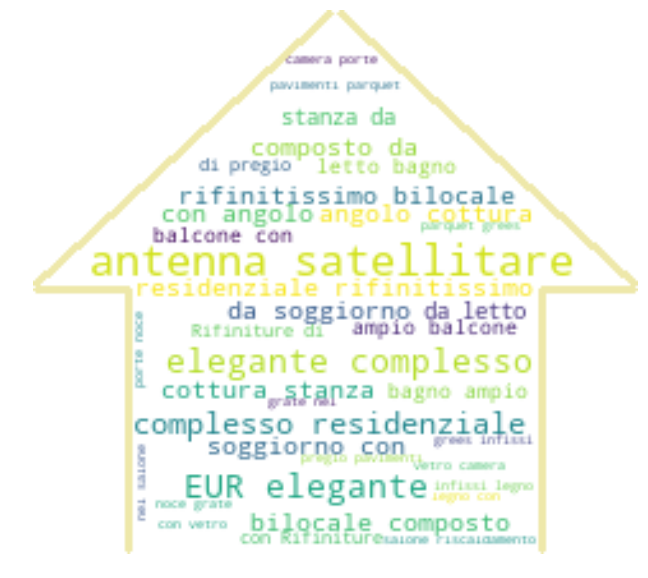

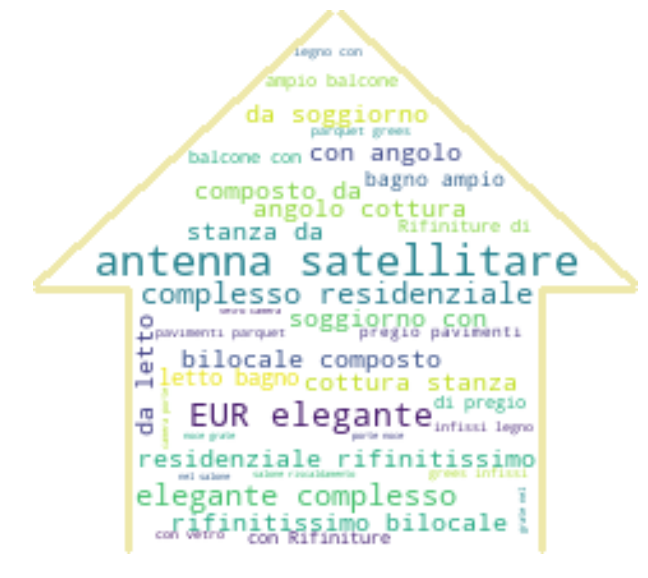

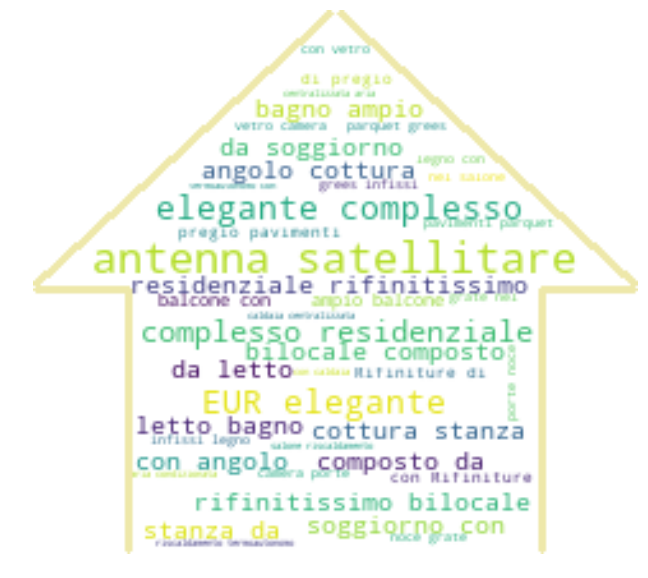

In [107]:
i=0
for item in top_3_clustors:
    first, second = item
    descr=""
    if type(first) is list:
        for index in first:
            description = ''.join(list(df_info[:1]["Description"])).replace("\n","").rstrip().lstrip()
            descr+=description
    if type(second) is list:
        for index in second:
            description = ''.join(list(df_info[:1]["Description"])).replace("\n","").rstrip().lstrip()
            descr+=description
    # Create and generate a word cloud image:
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white", mask=house_mask,
                contour_width=3, contour_color='palegoldenrod')
    # Generate a wordcloud
    wc.generate(descr)
    # store to file
    wc.to_file("house_"+str(i) +".png")
    # show
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    i=i+1
    